In [2]:
import pandas as pd

In [3]:
fruits = pd.read_table('../datasets/fruit_data_with_colors.txt')

In [4]:
fruits.head(5)

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [5]:
pesada = fruits['mass'] > 150
maca = fruits['fruit_name'] == 'apple'
leve = fruits['mass'] <= 150

In [6]:
fruits[maca | leve]

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79
5,2,mandarin,mandarin,80,5.8,4.3,0.77
6,2,mandarin,mandarin,80,5.9,4.3,0.81
7,2,mandarin,mandarin,76,5.8,4.0,0.81
8,1,apple,braeburn,178,7.1,7.8,0.92
9,1,apple,braeburn,172,7.4,7.0,0.89


In [7]:
tamanho = fruits[['height','width','fruit_label']]

In [8]:
tamanho.head(3)

,height,width,fruit_label
0,7.3,8.4,1
1,6.8,8.0,1
2,7.2,7.4,1


In [9]:
import matplotlib.pyplot as plt

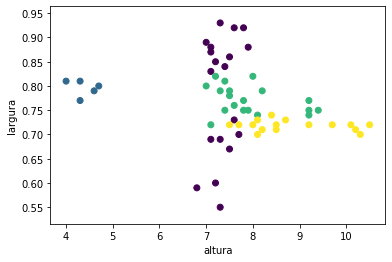

In [10]:
plt.scatter(fruits['height'],fruits['color_score'], c=fruits['fruit_label'])
plt.xlabel('altura')
plt.ylabel('largura')
plt.show()

In [11]:
fruits[maca].describe()

,fruit_label,mass,width,height,color_score
count,19.0,19.000000,19.000000,19.000000,19.000000
mean,1.0,165.052632,7.457895,7.342105,0.783684
std,0.0,11.969747,0.345311,0.291196,0.124196
min,1.0,140.000000,6.900000,6.800000,0.550000
25%,1.0,156.000000,7.300000,7.100000,0.690000
50%,1.0,164.000000,7.400000,7.300000,0.840000
75%,1.0,172.000000,7.600000,7.550000,0.880000
max,1.0,192.000000,8.400000,7.900000,0.930000


In [12]:
fruits.corr()

,fruit_label,mass,width,height,color_score
fruit_label,1.000000,0.032738,-0.298090,0.508766,-0.310521
mass,0.032738,1.000000,0.877687,0.609571,-0.079794
width,-0.298090,0.877687,1.000000,0.396848,-0.076576
height,0.508766,0.609571,0.396848,1.000000,-0.247047
color_score,-0.310521,-0.079794,-0.076576,-0.247047,1.000000


In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X = fruits[['mass','height','width','color_score']]
y = fruits['fruit_label']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.75)

In [17]:
knn = KNeighborsClassifier(n_neighbors=3)

In [18]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [19]:
knn.score(X_test,y_test)

0.8666666666666667

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
mm = MinMaxScaler()
Xtr_scaled = mm.fit_transform(X_train)
Xte_scaled = mm.transform(X_test)

In [22]:
knn.fit(Xtr_scaled,y_train)
knn.score(Xte_scaled,y_test)

1.0

In [23]:
tr = []
te = []
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(Xtr_scaled,y_train)
    tr.append(knn.score(Xtr_scaled,y_train))
    te.append(knn.score(Xte_scaled,y_test))

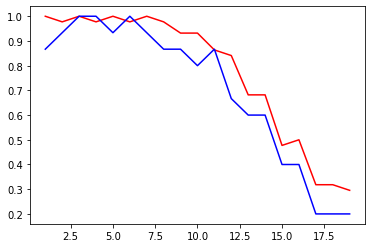

In [24]:
plt.plot(range(1,20),tr,'r-')
plt.plot(range(1,20),te,'b-')
plt.show()

In [25]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression

In [26]:
data = load_boston()
print(data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [27]:
X = data['data']
y = data['target']

In [28]:
lr = LinearRegression()
X_train,X_test,y_train,y_test = train_test_split(X,
                                                 y,
                                                 train_size=0.7)

In [29]:
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.7642720779913407

In [30]:
mm = MinMaxScaler()
Xtr = mm.fit_transform(X_train)
Xte = mm.transform(X_test)
lr.fit(Xtr,y_train)
lr.score(Xte,y_test)

0.7642720779913408

In [31]:
lr.coef_

array([ -9.66227637,   4.85470134,  -0.87289385,   2.64920325,
        -7.69951308,  17.66161707,  -0.34834959, -17.37006807,
         7.71383781,  -7.16537001,  -7.85932771,   4.4365086 ,
       -19.50484308])

In [32]:
import numpy as np
pd.DataFrame(data=np.concatenate((X,y.reshape(-1,1)),axis=1)).corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
1,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
2,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
3,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
4,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
5,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
6,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
7,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
8,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
9,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


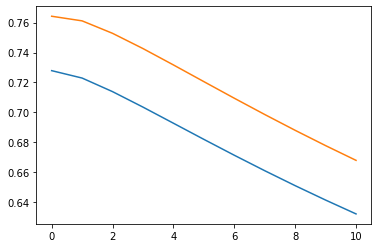

In [33]:
from sklearn.linear_model import Ridge
tr = []
te = []
for i in range(0,11,1):
    rid = Ridge(alpha=i)
    rid.fit(Xtr,y_train)
    tr.append(rid.score(Xtr,y_train))
    te.append(rid.score(Xte,y_test))
plt.plot(range(0,11,1),tr)
plt.plot(range(0,11,1),te)
plt.show()

/home/laercio/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
/home/laercio/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/home/laercio/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4061.7466601368974, tolerance: 2.98503052259887
  positive)


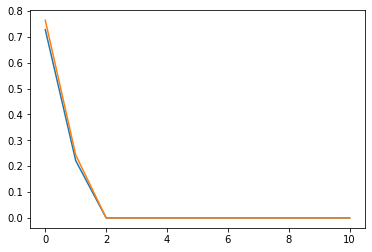

In [34]:
from sklearn.linear_model import Lasso
tr = []
te = []
for i in range(0,11,1):
    rid = Lasso(alpha=i)
    rid.fit(Xtr,y_train)
    tr.append(rid.score(Xtr,y_train))
    te.append(rid.score(Xte,y_test))
plt.plot(range(0,11,1),tr)
plt.plot(range(0,11,1),te)
plt.show()

In [35]:
rid = Ridge(alpha=1)
rid.fit(Xtr,y_train)
rid.score(Xte,y_test)
rid.coef_

array([ -6.03160844,   3.80640576,  -1.7479299 ,   2.90726261,
        -5.85811509,  16.58976922,  -0.28227401, -13.33663182,
         5.84771561,  -5.58409602,  -7.66384687,   4.3736553 ,
       -18.39463632])

In [36]:
rid = Ridge(alpha=1000000000000)
rid.fit(Xtr,y_train)
rid.score(Xte,y_test)
rid.coef_

array([-1.08273610e-10,  3.08164535e-10, -4.24595524e-10,  1.49563842e-10,
       -3.37374247e-10,  3.09401926e-10, -3.64533379e-10,  1.56425347e-10,
       -4.48606313e-10, -4.86761377e-10, -3.62345276e-10,  2.59662834e-10,
       -4.57249828e-10])

In [37]:
rid.score(Xte,y_test)

-2.30863129124792e-06

In [38]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)

In [39]:
X = load_boston()['data']
y = load_boston()['target']
X_poly = poly.fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(X_poly,y) 

In [40]:
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.7606118898362666

In [41]:
lr_poly = LinearRegression()
lr_poly.fit(X_train,y_train)
lr_poly.score(X_test,y_test)

0.7606118898362666

In [42]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

In [43]:
X = load_iris()['data']
y = load_iris()['target']
X_train,X_test,y_train,y_test = train_test_split(X,y)
lr = LogisticRegression(C=1)
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

/home/laercio/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/laercio/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.9736842105263158

In [44]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [45]:
lr.coef_

array([[ 0.38261925,  1.36774507, -2.13236828, -0.9592443 ],
       [ 0.25368514, -1.3331689 ,  0.56774496, -1.1683492 ],
       [-1.44853683, -1.56593657,  2.2404553 ,  2.1844645 ]])

In [46]:
from sklearn.datasets import load_breast_cancer

In [47]:
X,y = load_breast_cancer(return_X_y=True)
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [48]:
from sklearn.svm import SVC
import numpy as np
tr = []
te = []
for i in np.arange(0.1,10,0.5):
    svc = SVC(kernel='linear',C=i).fit(X_train,y_train)
    tr.append(svc.score(X_train,y_train))
    te.append(svc.score(X_test,y_test))

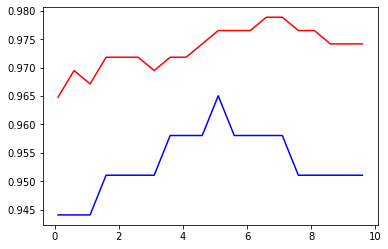

In [49]:
plt.plot(np.arange(0.1,10,0.5),tr,'r-')
plt.plot(np.arange(0.1,10,0.5),te,'b-')
plt.show()

In [50]:
from sklearn.model_selection import cross_val_score

In [51]:
clf = KNeighborsClassifier(n_neighbors=5)
cv_scores = cross_val_score(clf,X,y,cv=5)

In [52]:
cv_scores

array([0.88695652, 0.93913043, 0.9380531 , 0.94690265, 0.92920354])

In [53]:
np.mean(cv_scores)

0.9280492497114275

In [54]:
from sklearn.model_selection import validation_curve

In [55]:
clf = KNeighborsClassifier()

In [56]:
param_range = np.arange(1,5,1)

In [57]:
train_scores, test_scores = validation_curve(clf,
                                             X,
                                             y,
                                            param_name='n_neighbors',
                                            param_range=param_range,
                                            cv=3)

In [58]:
print(train_scores)

[[1.         1.         1.        ]
 [0.9762533  0.96833773 0.96052632]
 [0.95778364 0.95778364 0.95263158]
 [0.9525066  0.94459103 0.94473684]]


In [59]:
print(test_scores)

[[0.88421053 0.92631579 0.9047619 ]
 [0.89473684 0.93157895 0.88888889]
 [0.89473684 0.95263158 0.91534392]
 [0.90526316 0.95263158 0.9047619 ]]


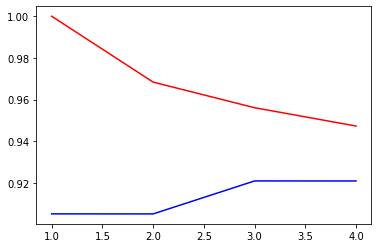

In [60]:
plt.plot(param_range,np.mean(train_scores,axis=1),'r-')
plt.plot(param_range,np.mean(test_scores,axis=1),'b-')
plt.show()

In [61]:
np.mean(train_scores,axis=1)

array([1.        , 0.96837245, 0.95606629, 0.94727816])

In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve

In [63]:
X,y = load_breast_cancer(return_X_y=True)

In [64]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [65]:
dt = DecisionTreeClassifier(max_depth=1)
dt.fit(X_train,y_train)
dt.score(X_test,y_test)

0.8811188811188811

In [66]:
param_range = np.arange(1,10)
train_scores, test_scores = validation_curve(dt,X,y,
                                            param_name='max_depth',
                                            param_range=param_range,
                                            cv=20)

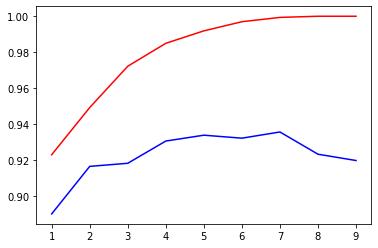

In [67]:
import matplotlib.pyplot as plt
plt.plot(param_range,np.mean(train_scores,axis=1),'r-')
plt.plot(param_range,np.mean(test_scores,axis=1),'b-')
plt.show()